In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
np.random.seed(200318155)
P = np.random.uniform(size=(4,4))
P = P / P.sum(axis=1, keepdims=1)
B = np.random.uniform(size=(4,3))
B = B / B.sum(axis=1, keepdims=1)

## Task1
Q = [1]
Obs = []
for i in range(2000):
    state = Q[-1] - 1
    r = np.random.uniform()
    if r <= B[state][0]:
        Obs.append(1)
    elif (B[state][0]) < r <= (B[state][0]+B[state][1]):
        Obs.append(2)
    else:
        Obs.append(3)
    
    r_state = np.random.uniform()
    if r_state <= P[state][0]:
        Q.append(1)
    elif P[state][0] < r_state <= (P[state][1]+P[state][0]):
        Q.append(2)
    elif (P[state][1]+P[state][0]) < r_state <= (P[state][1]+P[state][2]):
        Q.append(3)
    else:
        Q.append(4)


In [3]:
from hmmlearn import hmm
np.random.seed(200318155)
obs = np.array(Obs) - np.ones((len(Obs)))
obs = np.array([obs], dtype=int).T
state = 2
AIC = []
BIC = []
L = []
S = []
m = 3
while state <= 10:
    model = hmm.MultinomialHMM(n_components=state)
    model.fit(obs)
    l = model.score(obs)
    p = m*m + m*state - 1
    aic = -2*l + 2*p
    bic = -2*l + p*np.log(len(obs))
    L.append(l)
    AIC.append(aic)
    BIC.append(bic)
    S.append(state)
    state += 1

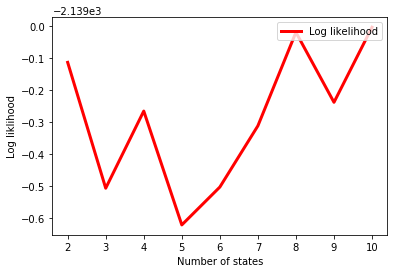

In [4]:
plt.plot(S, L, color='red', linewidth = 3, label = 'Log likelihood')
plt.legend(loc = 'upper right')
plt.xlabel('Number of states')
plt.ylabel('Log liklihood')
plt.show()

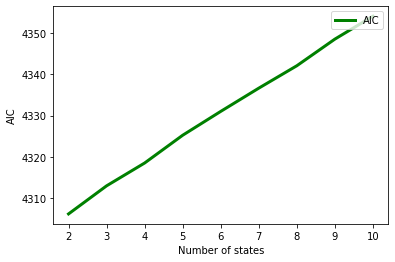

In [5]:
plt.plot(S, AIC, color='green', linewidth = 3, label = 'AIC')
plt.legend(loc = 'upper right')
plt.xlabel('Number of states')
plt.ylabel('AIC')
plt.show()

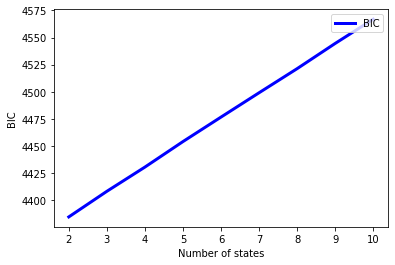

In [6]:
plt.plot(S, BIC, color='blue', linewidth = 3, label = 'BIC')
plt.legend(loc = 'upper right')
plt.xlabel('Number of states')
plt.ylabel('BIC')
plt.show()

Comments:
As we dont know the number of states for the HMM. I have created total of 2000 observations using the same process used in the Project5 task1. As suggested every parameter atleast needs minimum of 10 observation for its predictions. Thus to avoid any inacurate parameter prediction for HMM. Now i have used MutltinomialHMM from the hmmlearn library to create HMM with number of componets that is number of states as loop variable. Using the model generated I have fit the model using the generated observation. Using the model attribute I have calculate the Log Liklihood for the the model. Using this log liklihood value i have calculated the AIC and BIC values corresponding the number of states in the HMM. From the plotted graph of AIC vs Number of states, BIC vs Number of states we can see that the AIC and BIC values goes on increasing as we increase the number of states of the HMM. Thus to choose the appropriate number of hidden states the lower the AIC, BIC values are better the model is thus we need to find number of states which have lower values for AIC, BIC and greater value of log-likelihood. Thus from the log-logliklihood graph we can see that the value of log-liklihood goes on increasing if we increase the number of states after 5. Thus we can say that the model starts to overfit the observations that we have produced and the ideal number of states should be 4 for the HMM. 